In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


path = 'D:/projects/Python/Samsung2/House price/data/'
test = pd.read_csv(path + 'test.csv')
train = pd.read_csv(path + 'train.csv')



In [2]:

target = np.log(train.SalePrice) 


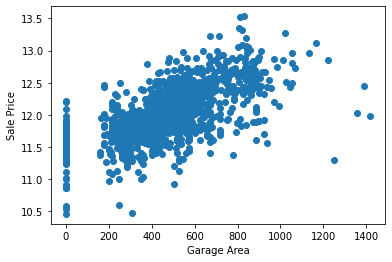

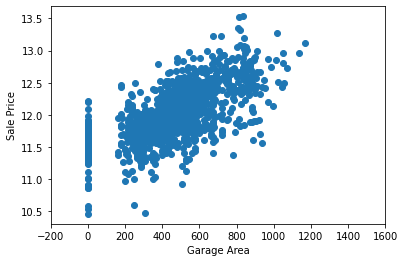

In [3]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

train = train[train['GarageArea'] < 1200]

plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) 
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()


In [4]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)


              Null Count
Feature                 
PoolQC              1449
MiscFeature         1402
Alley               1364
Fence               1174
FireplaceQu          689
LotFrontage          258
GarageYrBlt           81
GarageCond            81
GarageType            81
GarageFinish          81
GarageQual            81
BsmtFinType2          38
BsmtExposure          38
BsmtQual              37
BsmtCond              37
BsmtFinType1          37
MasVnrArea             8
MasVnrType             8
Electrical             1
Id                     0
Functional             0
Fireplaces             0
KitchenQual            0
KitchenAbvGr           0
BedroomAbvGr           0


In [5]:
print("Original: \n")
print(train.Street.value_counts(), "\n")

train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

print ('Encoded: \n')
print (train.enc_street.value_counts())


Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


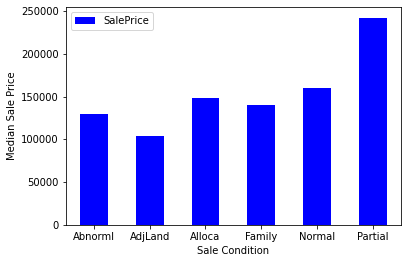

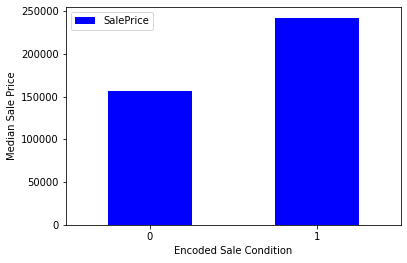

In [7]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()


def encode(x):
    return 1 if x == 'Partial' else 0


train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()


In [33]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

print(sum(data.isnull().sum() != 0))  #Check


0


In [34]:
y = target
X = data.drop(['SalePrice', 'Id'], axis=1)

In [35]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=.33)

In [36]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [37]:
model = lr.fit(X_train, y_train)


In [38]:
print("R^2 is: \n",model.score(X_test, y_test))

predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))


R^2 is: 
 0.8946333940763409
RMSE is: 
 0.016894269364861367


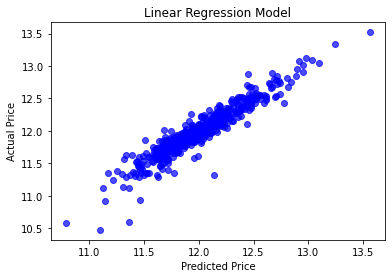

In [39]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,color='b')  #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()


In [40]:
submission = pd.DataFrame()
submission['Id'] = test.Id

feats = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()
predictions = model.predict(feats)

final_predictions = np.exp(predictions)

submission['SalePrice'] = final_predictions
submission.to_csv('submission_1.csv', index=False)
